## Livro

Bibliotecas - Pag 15 e 16

Cookiecutter (Pag 21): https://github.com/drivendata/cookiecutter-data-science

## **Bibliotecas (Import)**


In [90]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

## **Coleta de dados**


In [91]:
df = pd.read_csv("titanic.csv").drop(1309)
df

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3.0,0.0,"Zabour, Miss. Hileni",female,14.5000,1.0,0.0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3.0,0.0,"Zabour, Miss. Thamine",female,NaN,1.0,0.0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3.0,0.0,"Zakarian, Mr. Mapriededer",male,26.5000,0.0,0.0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3.0,0.0,"Zakarian, Mr. Ortin",male,27.0000,0.0,0.0,2670,7.2250,NaN,C,NaN,NaN,NaN


In [92]:
from sklearn.model_selection import (
    train_test_split
    )

df = df.drop(columns=[
    "name",
    "ticket",
    "home.dest",
    "boat",
    "body",
    "cabin"
])

teste = pd.get_dummies(df)
df = pd.get_dummies(df, drop_first=True) #substituindo colunas categoricas e dropando coluna correlacionada

y = df.survived
X = df.drop(columns='survived')
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
    ) 

In [93]:
from sklearn.experimental import (
    enable_iterative_imputer
)
from sklearn.impute import IterativeImputer

num_cols = ['pclass', 'age', 'sibsp', 'parch', 'fare', 'sex_male']

imputer = IterativeImputer()
imputed = imputer.fit_transform(X_train[num_cols])
X_train.loc[:,num_cols] = imputed
imputed = imputer.transform(X_test[num_cols])
X_test.loc[:,num_cols] = imputed

In [94]:
from sklearn import (
    preprocessing
    )

cols = "pclass,age,sibsp,parch,fare".split(",")
sca = preprocessing.StandardScaler()

normalize_train = sca.fit_transform(X_train[cols])
X_train = pd.DataFrame(normalize_train, columns=cols).join(X_train[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

normalize_test = sca.transform(X_test[cols])
X_test = pd.DataFrame(normalize_test, columns=cols).join(X_test[['sex_male','embarked_Q','embarked_S']].reset_index(drop=True))

In [95]:
X = pd.concat([X_train, X_test]).reset_index(drop=True)
y = pd.concat([y_train, y_test]).reset_index(drop=True)

## **Upsampling**

Resample

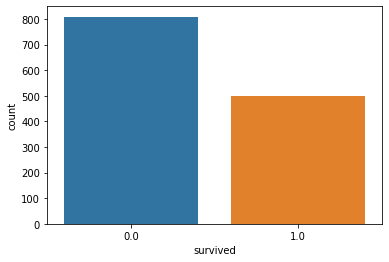

In [96]:
sns.countplot(x=y)

In [97]:
mask = df.survived == 1
surv_df = df[mask]
death_df = df[~mask]

In [98]:
print(df.survived.value_counts())
print()
df.survived.value_counts() / df.survived.count() * 100

0.0    809
1.0    500
Name: survived, dtype: int64



0.0    61.802903
1.0    38.197097
Name: survived, dtype: float64

In [99]:
from sklearn.utils import resample

df_upsample = resample(
    surv_df,
    replace=True,
    n_samples=len(death_df),
    random_state=42,
)

In [100]:
df2 = pd.concat([death_df, df_upsample])

df2.survived.value_counts()


0.0    809
1.0    809
Name: survived, dtype: int64

RandomOverSampler

In [101]:
from imblearn.over_sampling import (
    RandomOverSampler,
)
ros = RandomOverSampler(random_state=42)
X_ros, y_ros = ros.fit_resample(X, y)
pd.Series(y_ros).value_counts()

0.0    809
1.0    809
Name: survived, dtype: int64

SMOTE


In [102]:
!pip install imbalanced-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [103]:
from collections import Counter
from imblearn.over_sampling import SMOTE

print('Original dataset shape %s' % Counter(y))

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Original dataset shape Counter({0.0: 809, 1.0: 500})
Resampled dataset shape Counter({0.0: 809, 1.0: 809})


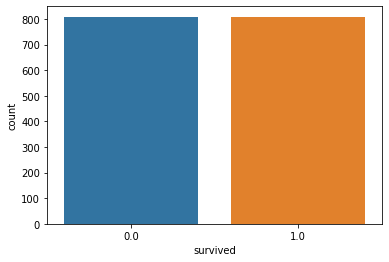

In [104]:
sns.countplot(x=y_res)

ADASYN

In [105]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import ADASYN

print('Original dataset shape %s' % Counter(y))

ada = ADASYN(random_state=42)
X_res, y_res = ada.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 809, 1.0: 500})
Resampled dataset shape Counter({0.0: 809, 1.0: 770})


## **Undersampling**

Resample

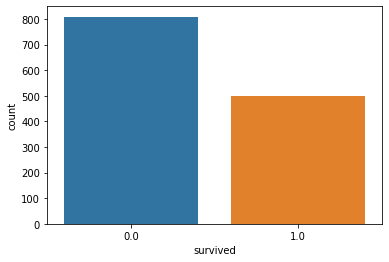

In [106]:
sns.countplot(x=y)

RandomUnderSampler

In [107]:
from sklearn.utils import resample

df_downsample = resample(
    death_df,
    replace=False,
    n_samples=len(surv_df),
    random_state=42,
)
df3 = pd.concat([surv_df, df_downsample])

df3.survived.value_counts()

1.0    500
0.0    500
Name: survived, dtype: int64

RandomUnderSampler

In [108]:
from imblearn.under_sampling import RandomUnderSampler

print('Original dataset shape %s' % Counter(y))

rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0.0: 809, 1.0: 500})
Resampled dataset shape Counter({0.0: 500, 1.0: 500})


NearMiss

In [109]:
from imblearn.under_sampling import NearMiss

nm = NearMiss()
X_res, y_res = nm.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({0.0: 500, 1.0: 500})


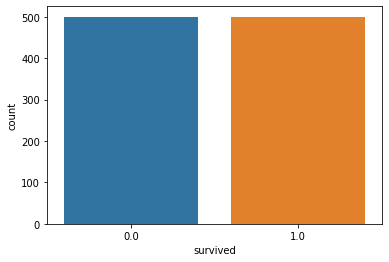

In [110]:
sns.countplot(x=y_res)

Combine (SMOTETomek ou SMOTENN)

In [111]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42) # sme = SMOTEENN(random_state=42)
X_res, y_res = smt.fit_resample(X, y)
print('Resampled dataset shape %s' % Counter(y_res))


Resampled dataset shape Counter({0.0: 742, 1.0: 742})


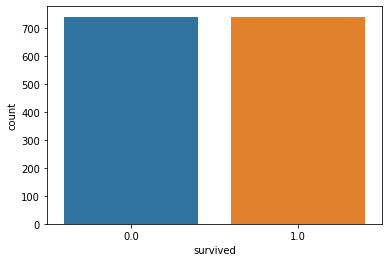

In [112]:
sns.countplot(x=y_res)